In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, balanced_accuracy_score, f1_score, precision_score, recall_score, matthews_corrcoef
import xgboost
from scipy.constants import G

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_koi = pd.read_csv(r'..\data\koi\koi.csv')
koi_useful_columns = ['koi_disposition', 'koi_pdisposition', 'koi_period',
                  'koi_impact', 'koi_duration', 'koi_depth', 'koi_prad', 'koi_teq',
                  'koi_steff', 'koi_srad', 'ra',
                  'dec']

koi_cleaned = df_koi[koi_useful_columns]

In [3]:
koi_fp = koi_cleaned[(koi_cleaned['koi_disposition'] == 'FALSE POSITIVE')|(koi_cleaned['koi_pdisposition'] == 'FALSE POSITIVE')]
koi_diff = koi_fp[koi_fp['koi_disposition'] != koi_fp['koi_pdisposition']]
diff_ind = koi_diff.index

In [4]:
koi_cleaned.drop(index = diff_ind, inplace = True)
koi_cleaned.drop(columns = ['koi_pdisposition'], inplace = True)

In [5]:
koi_cleaned.dropna(inplace = True)

In [6]:
koi_cleaned = koi_cleaned[koi_cleaned['koi_disposition'] != 'CANDIDATE']

In [7]:
koi_cleaned['is_planet'] = koi_cleaned['koi_disposition'].apply(lambda x: 1 if x != 'FALSE POSITIVE' else 0)
koi_cleaned.drop(columns = ['koi_disposition'], inplace = True)

In [8]:
X = koi_cleaned.drop(columns = ['is_planet'])
y = koi_cleaned['is_planet']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.1, stratify = y_train, random_state = 42)

In [10]:
X

,koi_period,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_steff,koi_srad,ra,dec
0,9.488036,0.146,2.95750,615.8,2.26,793.0,5455.0,0.927,291.93423,48.141651
1,54.418383,0.586,4.50700,874.8,2.83,443.0,5455.0,0.927,291.93423,48.141651
3,1.736952,1.276,2.40641,8079.2,33.46,1395.0,5805.0,0.791,285.53461,48.285210
4,2.525592,0.701,1.65450,603.3,2.75,1406.0,6031.0,1.046,288.75488,48.226200
5,11.094321,0.538,4.59450,1517.5,3.90,835.0,6046.0,0.972,296.28613,48.224670
...,...,...,...,...,...,...,...,...,...,...
9557,373.893980,0.963,27.66000,730.0,2.51,206.0,5263.0,0.699,290.93597,47.290730
9558,8.589871,0.765,4.80600,87.7,1.11,929.0,5638.0,1.088,298.74921,46.973351
9559,0.527699,1.252,3.22210,1579.2,29.35,2088.0,5638.0,0.903,297.18875,47.093819
9561,0.681402,0.147,0.86500,103.6,1.07,2218.0,6173.0,1.041,294.16489,47.176281


In [11]:
kf = KFold(n_splits = 5, shuffle = True, )
xgbmodel = xgboost.XGBClassifier(
    learning_rate = 0.02,
    n_estimators = 5000,
    verbosity = 2,
    early_stopping_rounds = 100
)

xgbmodel.fit(X_train, y_train, eval_set = [(X_valid, y_valid)])

[01:02:02] INFO: C:\actions-runner\_work\xgboost\xgboost\src\data\iterative_dmatrix.cc:53: Finished constructing the `IterativeDMatrix`: (5267, 10, 52670).
[01:02:02] INFO: C:\actions-runner\_work\xgboost\xgboost\src\data\iterative_dmatrix.cc:53: Finished constructing the `IterativeDMatrix`: (586, 10, 5860).
[0]	validation_0-logloss:0.64986
[1]	validation_0-logloss:0.63927
[2]	validation_0-logloss:0.62902
[3]	validation_0-logloss:0.61916
[4]	validation_0-logloss:0.60982
[5]	validation_0-logloss:0.60058
[6]	validation_0-logloss:0.59167
[7]	validation_0-logloss:0.58342
[8]	validation_0-logloss:0.57534
[9]	validation_0-logloss:0.56748
[10]	validation_0-logloss:0.55972
[11]	validation_0-logloss:0.55234
[12]	validation_0-logloss:0.54521
[13]	validation_0-logloss:0.53850
[14]	validation_0-logloss:0.53182
[15]	validation_0-logloss:0.52550
[16]	validation_0-logloss:0.51935
[17]	validation_0-logloss:0.51330
[18]	validation_0-logloss:0.50756
[19]	validation_0-logloss:0.50214
[20]	validation_0-lo

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,100
,enable_categorical,False
,eval_metric,None


In [12]:
y_probas = xgbmodel.predict_proba(X_test)[:, 1]
y_pred = y_probas > 0.4387755102040816   

In [13]:
print(classification_report(y_test, y_pred, digits = 5))

              precision    recall  f1-score   support

           0    0.94811   0.87677   0.91105       917
           1    0.81656   0.91956   0.86500       547

    accuracy                        0.89276      1464
   macro avg    0.88234   0.89817   0.88803      1464
weighted avg    0.89896   0.89276   0.89384      1464



In [14]:
print(confusion_matrix(y_test, y_pred))

[[804 113]
 [ 44 503]]


In [15]:
print(balanced_accuracy_score(y_test, y_pred))

0.8981666630116887


In [16]:
recalls = []
precisions = []
f1s = []
mccs = []
bas = []
thresholds = np.linspace(0, 1, 99)
for t in thresholds:
    y_pred = y_probas > t
    recalls.append(recall_score(y_test, y_pred, average = 'macro'))
    precisions.append(precision_score(y_test, y_pred, average = 'macro'))
    f1s.append(f1_score(y_test, y_pred, average = 'macro'))
    mccs.append(matthews_corrcoef(y_test, y_pred))
    bas.append(balanced_accuracy_score(y_test, y_pred))

In [17]:
print(thresholds[recalls.index(max(recalls))], max(recalls))
print(thresholds[precisions.index(max(precisions))], max(precisions))
print(thresholds[f1s.index(max(f1s))], max(f1s))
print(thresholds[mccs.index(max(mccs))], max(mccs))
print(thresholds[bas.index(max(bas))], max(bas))
print(roc_auc_score(y_test, y_probas))


0.5102040816326531 0.9021439436681492
0.6326530612244897 0.8905918990756536
0.5102040816326531 0.8945852018211786
0.5102040816326531 0.7915535868985628
0.5102040816326531 0.9021439436681492
0.9582375562949687


In [18]:
""" 
0.3469387755102041 0.950086571325778
0.44897959183673464 0.941597784556535
0.4387755102040816 0.9446710070909189
0.4387755102040816 0.8905226274689714
0.3469387755102041 0.950086571325778
"""

' \n0.3469387755102041 0.950086571325778\n0.44897959183673464 0.941597784556535\n0.4387755102040816 0.9446710070909189\n0.4387755102040816 0.8905226274689714\n0.3469387755102041 0.950086571325778\n'

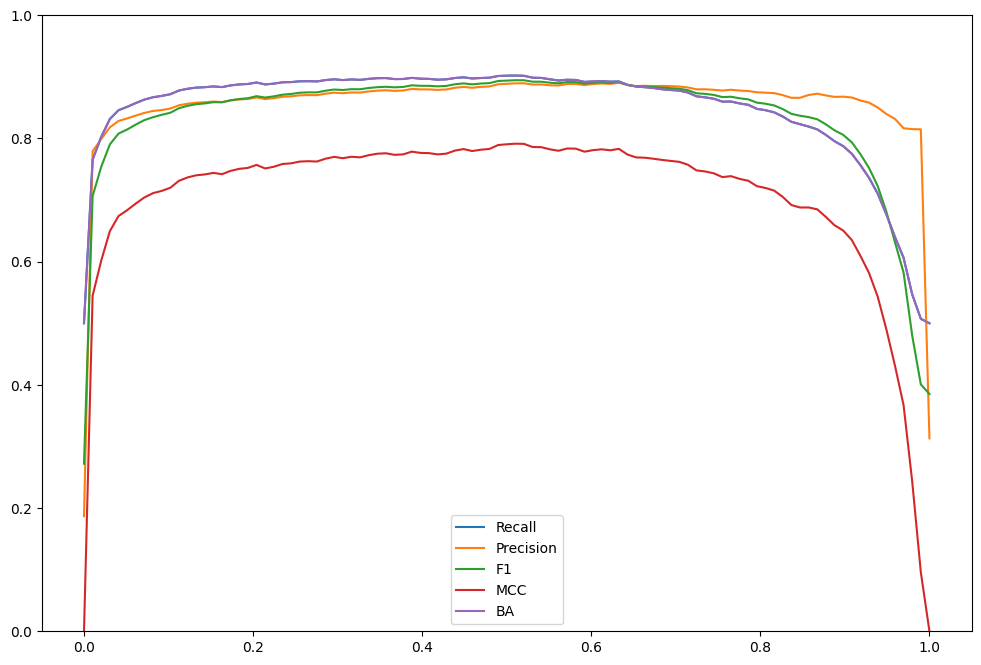

In [19]:
plt.figure(figsize = (12, 8))
plt.ylim(0, 1)
sns.lineplot(x = thresholds, y = recalls, label = 'Recall')
sns.lineplot(x = thresholds, y = precisions, label = 'Precision')
sns.lineplot(x = thresholds, y = f1s, label = 'F1')
sns.lineplot(x = thresholds, y = mccs, label = 'MCC')
sns.lineplot(x = thresholds, y = bas, label = 'BA')
plt.legend()

In [20]:
print(roc_auc_score(y_test, y_probas))

0.9582375562949687


<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

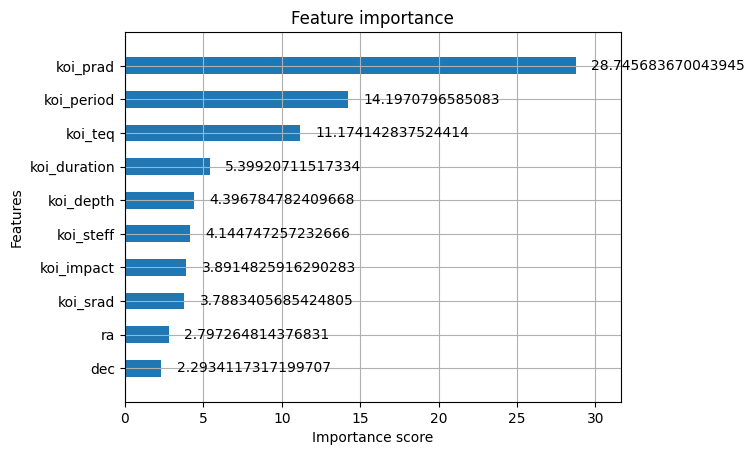

In [21]:
xgboost.plot_importance(xgbmodel, importance_type="gain", height=0.5)

In [22]:
xgbmodel.save_model('init_xgb.json')